In [1]:
# Model Training
from datasets import load_from_disk

datasets = load_from_disk("./encoded_data4")
datasets

c:\Users\user\Desktop\QuestionQuestionModel\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DatasetDict({
    train: Dataset({
        features: ['String', 'Algorithm Design', 'Basic Machine Organisation', 'Computer System', 'Data Manipulation and Analysis', 'Data Organisation and Data Control', 'Elementary Web Authoring', 'Health and Ethical Issues', 'Information Processing', 'Intellectual Property', 'Internet Services and Applications', 'Multimedia Elements', 'Networking and Internet Basics', 'Program Development', 'Spreadsheets and Databases', 'Threats and Security on the Internet', '__index_level_0__'],
        num_rows: 644
    })
    valid: Dataset({
        features: ['String', 'Algorithm Design', 'Basic Machine Organisation', 'Computer System', 'Data Manipulation and Analysis', 'Data Organisation and Data Control', 'Elementary Web Authoring', 'Health and Ethical Issues', 'Information Processing', 'Intellectual Property', 'Internet Services and Applications', 'Multimedia Elements', 'Networking and Internet Basics', 'Program Development', 'Spreadsheets and Databases', '

In [2]:
datasets = datasets.remove_columns(['__index_level_0__'])

In [3]:
datasets

DatasetDict({
    train: Dataset({
        features: ['String', 'Algorithm Design', 'Basic Machine Organisation', 'Computer System', 'Data Manipulation and Analysis', 'Data Organisation and Data Control', 'Elementary Web Authoring', 'Health and Ethical Issues', 'Information Processing', 'Intellectual Property', 'Internet Services and Applications', 'Multimedia Elements', 'Networking and Internet Basics', 'Program Development', 'Spreadsheets and Databases', 'Threats and Security on the Internet'],
        num_rows: 644
    })
    valid: Dataset({
        features: ['String', 'Algorithm Design', 'Basic Machine Organisation', 'Computer System', 'Data Manipulation and Analysis', 'Data Organisation and Data Control', 'Elementary Web Authoring', 'Health and Ethical Issues', 'Information Processing', 'Intellectual Property', 'Internet Services and Applications', 'Multimedia Elements', 'Networking and Internet Basics', 'Program Development', 'Spreadsheets and Databases', 'Threats and Security 

In [4]:
model_labels = [label for label in datasets['train'].features.keys() if label not in ['Unnamed: 0', 'String', '__index_level_0__']]

In [5]:
model_labels

['Algorithm Design',
 'Basic Machine Organisation',
 'Computer System',
 'Data Manipulation and Analysis',
 'Data Organisation and Data Control',
 'Elementary Web Authoring',
 'Health and Ethical Issues',
 'Information Processing',
 'Intellectual Property',
 'Internet Services and Applications',
 'Multimedia Elements',
 'Networking and Internet Basics',
 'Program Development',
 'Spreadsheets and Databases',
 'Threats and Security on the Internet']

In [6]:
datasets["train"].column_names

['String',
 'Algorithm Design',
 'Basic Machine Organisation',
 'Computer System',
 'Data Manipulation and Analysis',
 'Data Organisation and Data Control',
 'Elementary Web Authoring',
 'Health and Ethical Issues',
 'Information Processing',
 'Intellectual Property',
 'Internet Services and Applications',
 'Multimedia Elements',
 'Networking and Internet Basics',
 'Program Development',
 'Spreadsheets and Databases',
 'Threats and Security on the Internet']

In [7]:
datasets["train"].features

{'String': Value(dtype='string', id=None),
 'Algorithm Design': Value(dtype='int32', id=None),
 'Basic Machine Organisation': Value(dtype='int32', id=None),
 'Computer System': Value(dtype='int32', id=None),
 'Data Manipulation and Analysis': Value(dtype='int32', id=None),
 'Data Organisation and Data Control': Value(dtype='int32', id=None),
 'Elementary Web Authoring': Value(dtype='int32', id=None),
 'Health and Ethical Issues': Value(dtype='int32', id=None),
 'Information Processing': Value(dtype='int32', id=None),
 'Intellectual Property': Value(dtype='int32', id=None),
 'Internet Services and Applications': Value(dtype='int32', id=None),
 'Multimedia Elements': Value(dtype='int32', id=None),
 'Networking and Internet Basics': Value(dtype='int32', id=None),
 'Program Development': Value(dtype='int32', id=None),
 'Spreadsheets and Databases': Value(dtype='int32', id=None),
 'Threats and Security on the Internet': Value(dtype='int32', id=None)}

In [8]:
#print(f"{datasets.train.column_names}\n{datasets.train.features}")

In [9]:
model_labels

['Algorithm Design',
 'Basic Machine Organisation',
 'Computer System',
 'Data Manipulation and Analysis',
 'Data Organisation and Data Control',
 'Elementary Web Authoring',
 'Health and Ethical Issues',
 'Information Processing',
 'Intellectual Property',
 'Internet Services and Applications',
 'Multimedia Elements',
 'Networking and Internet Basics',
 'Program Development',
 'Spreadsheets and Databases',
 'Threats and Security on the Internet']

In [10]:
id2label = {idx:label for idx, label in enumerate(model_labels)}
label2id = {label:idx for idx, label in enumerate(model_labels)}

In [11]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import numpy as np

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

In [12]:
def encode_data(dataset):
    text = dataset["String"]
    # tokenize string
    encoding = tokenizer(text, padding="max_length", truncation=True, max_length=70)
    # create encoded array list with labels
    labelsBatch = {x: dataset[x] for x in dataset.keys() if x in model_labels}
    labels_matrix = np.zeros((len(text), len(model_labels)))
    for idx, label in enumerate(model_labels):
        labels_matrix[:, idx] = labelsBatch[label]
    
    encoding["labels"] = labels_matrix.tolist()
    return encoding

In [13]:
# tokenize the dataset
encoded_ds = datasets.map(encode_data, batched=True, remove_columns=datasets['train'].column_names)

Loading cached processed dataset at c:\Users\user\Desktop\QuestionQuestionModel\model\encoded_data4\train\cache-7700797c4d7f932e.arrow
Loading cached processed dataset at c:\Users\user\Desktop\QuestionQuestionModel\model\encoded_data4\valid\cache-ea223c76f3455998.arrow
Loading cached processed dataset at c:\Users\user\Desktop\QuestionQuestionModel\model\encoded_data4\test\cache-459aacbf91ebbdc4.arrow


In [14]:
encoded_ds['train']['labels'][0]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]

In [15]:
[id2label[idx] for idx, label in enumerate(encoded_ds['train'][15]['labels']) if label == 1.0]

['Data Organisation and Data Control']

In [16]:
import torch
from torch import cuda
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

encoded_ds.set_format("torch")

Using device: cuda



In [17]:
encoded_ds["train"]

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 644
})

In [18]:

# define model
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", problem_type="multi_label_classification", num_labels=len(model_labels), id2label=id2label, label2id=label2id)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'pre_clas

In [19]:
# train model
batch_size = 8
metric_name = "f1"

In [20]:
import evaluate
metric  = evaluate.load("accuracy")

In [21]:
import time

train_name_dir = time.strftime(f"%Y%m%d_%H%M%S$-train-model-{model.name_or_path}")
train_name_dir

'20230329_103603$-train-model-distilbert-base-uncased'

In [22]:
from transformers import TrainingArguments, Trainer


args = TrainingArguments(
    output_dir="./distlBert-v10/"+ train_name_dir,
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs= 81,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    logging_dir='./distlBert-v10/logging/'+ train_name_dir
)

In [23]:
args.learning_rate

2e-05

In [24]:
from transformers import AdamW
optimizer = AdamW(model.parameters(), lr=args.learning_rate, weight_decay=args.weight_decay)

c:\Users\user\Desktop\QuestionQuestionModel\venv\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [25]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, balanced_accuracy_score, hamming_loss
from transformers import EvalPrediction


def multi_label_metrics(predictions, labels, threshold=0.50):
    # apply sigmoid on predictions fitting (batch_size, num_labels)
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))
    # use threshold to turn them into integer predictions
    y_pred = np.zeros(probs.shape)
    y_pred[np.where(probs >= threshold)] = 1
    # compute metrics
    y_true = labels
    f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average='micro')
    roc_auc = roc_auc_score(y_true, y_pred, average = 'micro')
    accuracy = accuracy_score(y_true, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_true.argmax(axis=1), y_pred.argmax(axis=1))
    # logits, labels = predictions
    # prediction = np.argmax(logits, axis=-1)
    # return as dictionary
    metrics = {'f1': f1_micro_average,
               'roc_auc': roc_auc,
               'accuracy': accuracy,
               'balanced_accuracy': balanced_accuracy,
               }
    return metrics

def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions, 
            tuple) else p.predictions
    result = multi_label_metrics(
        predictions=preds, 
        labels=p.label_ids)
    return result

def compute_metrics_new(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [26]:
encoded_ds['train'][0]['labels'].type()

'torch.FloatTensor'

In [27]:
# model.to(device)

In [28]:
outputs = model(input_ids=encoded_ds['train']['input_ids'][0].unsqueeze(0), labels=encoded_ds['train'][0]['labels'].unsqueeze(0))
outputs

SequenceClassifierOutput(loss=tensor(0.6868, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), logits=tensor([[-0.0290,  0.0643, -0.0415,  0.1615, -0.1406,  0.1397, -0.0361, -0.0566,
         -0.1169, -0.0155,  0.0683, -0.0058,  0.0523, -0.0006, -0.1242]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [29]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_ds["train"],
    eval_dataset=encoded_ds["valid"],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)

In [30]:
trainer.train()

***** Running training *****
  Num examples = 644
  Num Epochs = 81
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 6561
  Number of trainable parameters = 66965007
  1%|          | 81/6561 [00:10<05:08, 20.98it/s]  ***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                 
  1%|          | 81/6561 [00:11<05:08, 20.98it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-81
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-81\config.json


{'eval_loss': 0.2775842249393463, 'eval_f1': 0.0, 'eval_roc_auc': 0.5, 'eval_accuracy': 0.0, 'eval_balanced_accuracy': 0.06666666666666667, 'eval_runtime': 0.1493, 'eval_samples_per_second': 542.619, 'eval_steps_per_second': 73.689, 'epoch': 1.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-81\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-81\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-81\special_tokens_map.json
  2%|▏         | 161/6561 [00:15<05:05, 20.98it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                  
  2%|▏         | 162/6561 [00:16<05:05, 20.98it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-162
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-162\config.json


{'eval_loss': 0.2513124346733093, 'eval_f1': 0.0, 'eval_roc_auc': 0.5, 'eval_accuracy': 0.0, 'eval_balanced_accuracy': 0.06666666666666667, 'eval_runtime': 0.1318, 'eval_samples_per_second': 614.462, 'eval_steps_per_second': 83.445, 'epoch': 2.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-162\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-162\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-162\special_tokens_map.json
  4%|▎         | 242/6561 [00:20<05:02, 20.88it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                  
  4%|▎         | 243/6561 [00:21<05:02, 20.88it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-243
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-243\config.json


{'eval_loss': 0.22801357507705688, 'eval_f1': 0.0, 'eval_roc_auc': 0.5, 'eval_accuracy': 0.0, 'eval_balanced_accuracy': 0.06666666666666667, 'eval_runtime': 0.1319, 'eval_samples_per_second': 614.09, 'eval_steps_per_second': 83.395, 'epoch': 3.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-243\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-243\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-243\special_tokens_map.json
  5%|▍         | 322/6561 [00:25<04:48, 21.61it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                  
  5%|▍         | 324/6561 [00:26<04:48, 21.61it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-324
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-324\config.json


{'eval_loss': 0.1908831000328064, 'eval_f1': 0.20833333333333334, 'eval_roc_auc': 0.5581395348837209, 'eval_accuracy': 0.1111111111111111, 'eval_balanced_accuracy': 0.1482828282828283, 'eval_runtime': 0.1332, 'eval_samples_per_second': 608.264, 'eval_steps_per_second': 82.604, 'epoch': 4.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-324\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-324\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-324\special_tokens_map.json
  6%|▌         | 405/6561 [00:31<05:04, 20.20it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                  
  6%|▌         | 405/6561 [00:31<05:04, 20.20it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-405
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-405\config.json


{'eval_loss': 0.1558850258588791, 'eval_f1': 0.37735849056603776, 'eval_roc_auc': 0.6162790697674418, 'eval_accuracy': 0.24691358024691357, 'eval_balanced_accuracy': 0.24424242424242423, 'eval_runtime': 0.1343, 'eval_samples_per_second': 603.203, 'eval_steps_per_second': 81.917, 'epoch': 5.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-405\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-405\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-405\special_tokens_map.json
  7%|▋         | 484/6561 [00:36<05:03, 20.02it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                  
  7%|▋         | 486/6561 [00:36<05:03, 20.02it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-486
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-486\config.json


{'eval_loss': 0.13229277729988098, 'eval_f1': 0.576, 'eval_roc_auc': 0.7079737161925558, 'eval_accuracy': 0.41975308641975306, 'eval_balanced_accuracy': 0.37922077922077924, 'eval_runtime': 0.1342, 'eval_samples_per_second': 603.684, 'eval_steps_per_second': 81.982, 'epoch': 6.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-486\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-486\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-486\special_tokens_map.json
  8%|▊         | 504/6561 [00:38<06:23, 15.78it/s]

{'loss': 0.227, 'learning_rate': 1.8475842097241278e-05, 'epoch': 6.17}


  9%|▊         | 566/6561 [00:41<05:18, 18.80it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                  
  9%|▊         | 567/6561 [00:41<05:18, 18.80it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-567
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-567\config.json


{'eval_loss': 0.11846067756414413, 'eval_f1': 0.6567164179104478, 'eval_roc_auc': 0.7540424743032526, 'eval_accuracy': 0.5308641975308642, 'eval_balanced_accuracy': 0.585916305916306, 'eval_runtime': 0.1299, 'eval_samples_per_second': 623.625, 'eval_steps_per_second': 84.69, 'epoch': 7.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-567\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-567\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-567\special_tokens_map.json
 10%|▉         | 646/6561 [00:46<04:44, 20.80it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                  
 10%|▉         | 648/6561 [00:47<04:44, 20.80it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-648
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-648\config.json


{'eval_loss': 0.1027400866150856, 'eval_f1': 0.7310344827586208, 'eval_roc_auc': 0.8054823161060416, 'eval_accuracy': 0.6296296296296297, 'eval_balanced_accuracy': 0.6126118326118326, 'eval_runtime': 0.1308, 'eval_samples_per_second': 619.365, 'eval_steps_per_second': 84.111, 'epoch': 8.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-648\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-648\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-648\special_tokens_map.json
 11%|█         | 727/6561 [00:51<04:36, 21.11it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                  
 11%|█         | 729/6561 [00:52<04:36, 21.11it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-729
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-729\config.json


{'eval_loss': 0.10168755799531937, 'eval_f1': 0.761904761904762, 'eval_roc_auc': 0.8233670463674377, 'eval_accuracy': 0.654320987654321, 'eval_balanced_accuracy': 0.681125541125541, 'eval_runtime': 0.13, 'eval_samples_per_second': 622.844, 'eval_steps_per_second': 84.584, 'epoch': 9.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-729\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-729\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-729\special_tokens_map.json
 12%|█▏        | 808/6561 [00:57<04:30, 21.27it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                  
 12%|█▏        | 810/6561 [00:57<04:30, 21.27it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-810
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-810\config.json


{'eval_loss': 0.09316472709178925, 'eval_f1': 0.7712418300653594, 'eval_roc_auc': 0.8394802974437142, 'eval_accuracy': 0.691358024691358, 'eval_balanced_accuracy': 0.7097835497835498, 'eval_runtime': 0.13, 'eval_samples_per_second': 623.15, 'eval_steps_per_second': 84.625, 'epoch': 10.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-810\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-810\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-810\special_tokens_map.json
 14%|█▎        | 889/6561 [01:02<04:29, 21.08it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                  
 14%|█▎        | 891/6561 [01:02<04:28, 21.08it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-891
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-891\config.json


{'eval_loss': 0.08779971301555634, 'eval_f1': 0.7763157894736842, 'eval_roc_auc': 0.8399231672399942, 'eval_accuracy': 0.7037037037037037, 'eval_balanced_accuracy': 0.7126118326118327, 'eval_runtime': 0.1352, 'eval_samples_per_second': 599.051, 'eval_steps_per_second': 81.353, 'epoch': 11.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-891\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-891\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-891\special_tokens_map.json
 15%|█▍        | 971/6561 [01:07<04:27, 20.91it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                  
 15%|█▍        | 972/6561 [01:07<04:27, 20.91it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-972
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-972\config.json


{'eval_loss': 0.08396471291780472, 'eval_f1': 0.7924528301886793, 'eval_roc_auc': 0.861850371804643, 'eval_accuracy': 0.7283950617283951, 'eval_balanced_accuracy': 0.7243867243867242, 'eval_runtime': 0.1313, 'eval_samples_per_second': 617.079, 'eval_steps_per_second': 83.801, 'epoch': 12.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-972\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-972\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-972\special_tokens_map.json
 15%|█▌        | 1004/6561 [01:10<04:44, 19.51it/s]

{'loss': 0.0477, 'learning_rate': 1.6951684194482548e-05, 'epoch': 12.35}


 16%|█▌        | 1052/6561 [01:12<04:20, 21.16it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 16%|█▌        | 1053/6561 [01:12<04:20, 21.16it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1053
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1053\config.json


{'eval_loss': 0.08855947107076645, 'eval_f1': 0.7741935483870968, 'eval_roc_auc': 0.8448513811358065, 'eval_accuracy': 0.7160493827160493, 'eval_balanced_accuracy': 0.7308946608946609, 'eval_runtime': 0.1295, 'eval_samples_per_second': 625.69, 'eval_steps_per_second': 84.97, 'epoch': 13.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1053\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1053\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1053\special_tokens_map.json
 17%|█▋        | 1134/6561 [01:32<04:12, 21.47it/s]  ***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 17%|█▋        | 1134/6561 [01:32<04:12, 21.47it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1134
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1134\config.json


{'eval_loss': 0.08801356703042984, 'eval_f1': 0.7922077922077922, 'eval_roc_auc': 0.8515510742167384, 'eval_accuracy': 0.7160493827160493, 'eval_balanced_accuracy': 0.7243578643578644, 'eval_runtime': 0.1313, 'eval_samples_per_second': 616.703, 'eval_steps_per_second': 83.75, 'epoch': 14.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1134\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1134\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1134\special_tokens_map.json
 19%|█▊        | 1215/6561 [01:37<04:08, 21.54it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 19%|█▊        | 1215/6561 [01:37<04:08, 21.54it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1215
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1215\config.json


{'eval_loss': 0.08715478330850601, 'eval_f1': 0.7924528301886793, 'eval_roc_auc': 0.861850371804643, 'eval_accuracy': 0.7283950617283951, 'eval_balanced_accuracy': 0.7497835497835497, 'eval_runtime': 0.1298, 'eval_samples_per_second': 623.901, 'eval_steps_per_second': 84.727, 'epoch': 15.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1215\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1215\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1215\special_tokens_map.json
 20%|█▉        | 1296/6561 [01:51<04:03, 21.59it/s]  ***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 20%|█▉        | 1296/6561 [01:51<04:03, 21.59it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1296
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1296\config.json


{'eval_loss': 0.08509615808725357, 'eval_f1': 0.7804878048780488, 'eval_roc_auc': 0.8658928461078954, 'eval_accuracy': 0.7160493827160493, 'eval_balanced_accuracy': 0.75991341991342, 'eval_runtime': 0.1291, 'eval_samples_per_second': 627.281, 'eval_steps_per_second': 85.186, 'epoch': 16.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1296\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1296\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1296\special_tokens_map.json
 21%|██        | 1377/6561 [01:56<04:01, 21.48it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 21%|██        | 1377/6561 [01:56<04:01, 21.48it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1377
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1377\config.json


{'eval_loss': 0.09224845468997955, 'eval_f1': 0.779874213836478, 'eval_roc_auc': 0.8555935485199909, 'eval_accuracy': 0.7037037037037037, 'eval_balanced_accuracy': 0.7332756132756132, 'eval_runtime': 0.1316, 'eval_samples_per_second': 615.347, 'eval_steps_per_second': 83.566, 'epoch': 17.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1377\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1377\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1377\special_tokens_map.json
 22%|██▏       | 1456/6561 [02:13<04:07, 20.66it/s]  ***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 22%|██▏       | 1458/6561 [02:14<04:06, 20.66it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1458
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1458\config.json


{'eval_loss': 0.08826462179422379, 'eval_f1': 0.8148148148148148, 'eval_roc_auc': 0.8792922322697593, 'eval_accuracy': 0.7407407407407407, 'eval_balanced_accuracy': 0.7938528138528139, 'eval_runtime': 0.1366, 'eval_samples_per_second': 592.761, 'eval_steps_per_second': 80.498, 'epoch': 18.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1458\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1458\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1458\special_tokens_map.json
 23%|██▎       | 1503/6561 [02:30<04:37, 18.24it/s]  

{'loss': 0.0135, 'learning_rate': 1.5427526291723824e-05, 'epoch': 18.52}


 23%|██▎       | 1539/6561 [02:32<03:57, 21.10it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 23%|██▎       | 1539/6561 [02:32<03:57, 21.10it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1539
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1539\config.json


{'eval_loss': 0.08507698029279709, 'eval_f1': 0.8242424242424243, 'eval_roc_auc': 0.8904772694502235, 'eval_accuracy': 0.7654320987654321, 'eval_balanced_accuracy': 0.8115295815295817, 'eval_runtime': 0.1327, 'eval_samples_per_second': 610.402, 'eval_steps_per_second': 82.894, 'epoch': 19.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1539\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1539\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1539\special_tokens_map.json
 25%|██▍       | 1619/6561 [02:37<03:57, 20.81it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 25%|██▍       | 1620/6561 [02:37<03:57, 20.81it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1620
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1620\config.json


{'eval_loss': 0.08786400407552719, 'eval_f1': 0.812121212121212, 'eval_roc_auc': 0.8842204461655716, 'eval_accuracy': 0.7530864197530864, 'eval_balanced_accuracy': 0.8004184704184705, 'eval_runtime': 0.136, 'eval_samples_per_second': 595.553, 'eval_steps_per_second': 80.878, 'epoch': 20.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1620\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1620\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1620\special_tokens_map.json
 26%|██▌       | 1699/6561 [02:54<03:51, 20.97it/s]  ***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 26%|██▌       | 1701/6561 [02:54<03:51, 20.97it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1701
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1701\config.json


{'eval_loss': 0.08360767364501953, 'eval_f1': 0.8170731707317073, 'eval_roc_auc': 0.8846633159618514, 'eval_accuracy': 0.7530864197530864, 'eval_balanced_accuracy': 0.7893073593073595, 'eval_runtime': 0.1304, 'eval_samples_per_second': 621.099, 'eval_steps_per_second': 84.347, 'epoch': 21.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1701\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1701\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1701\special_tokens_map.json
 27%|██▋       | 1782/6561 [03:13<03:42, 21.49it/s]  ***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 27%|██▋       | 1782/6561 [03:13<03:42, 21.49it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1782
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1782\config.json


{'eval_loss': 0.09380485862493515, 'eval_f1': 0.8074534161490684, 'eval_roc_auc': 0.8734782787813872, 'eval_accuracy': 0.7407407407407407, 'eval_balanced_accuracy': 0.7766089466089466, 'eval_runtime': 0.1321, 'eval_samples_per_second': 613.396, 'eval_steps_per_second': 83.301, 'epoch': 22.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1782\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1782\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1782\special_tokens_map.json
 28%|██▊       | 1863/6561 [03:18<03:38, 21.49it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 28%|██▊       | 1863/6561 [03:18<03:38, 21.49it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1863
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1863\config.json


{'eval_loss': 0.08986184000968933, 'eval_f1': 0.8292682926829267, 'eval_roc_auc': 0.8909201392465035, 'eval_accuracy': 0.7654320987654321, 'eval_balanced_accuracy': 0.8115295815295817, 'eval_runtime': 0.1314, 'eval_samples_per_second': 616.531, 'eval_steps_per_second': 83.726, 'epoch': 23.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1863\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1863\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1863\special_tokens_map.json
 30%|██▉       | 1943/6561 [03:35<03:40, 20.98it/s]  ***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 30%|██▉       | 1944/6561 [03:35<03:40, 20.98it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1944
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1944\config.json


{'eval_loss': 0.08925873786211014, 'eval_f1': 0.8148148148148148, 'eval_roc_auc': 0.8792922322697593, 'eval_accuracy': 0.7407407407407407, 'eval_balanced_accuracy': 0.7726406926406928, 'eval_runtime': 0.1331, 'eval_samples_per_second': 608.757, 'eval_steps_per_second': 82.671, 'epoch': 24.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1944\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1944\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-1944\special_tokens_map.json
 31%|███       | 2003/6561 [03:53<03:48, 19.93it/s]  

{'loss': 0.0061, 'learning_rate': 1.3903368388965097e-05, 'epoch': 24.69}


 31%|███       | 2024/6561 [03:54<03:37, 20.88it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 31%|███       | 2025/6561 [03:54<03:37, 20.88it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2025
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2025\config.json


{'eval_loss': 0.08822222054004669, 'eval_f1': 0.8414634146341462, 'eval_roc_auc': 0.8971769625311554, 'eval_accuracy': 0.7777777777777778, 'eval_balanced_accuracy': 0.8210533910533911, 'eval_runtime': 0.1308, 'eval_samples_per_second': 619.193, 'eval_steps_per_second': 84.088, 'epoch': 25.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2025\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2025\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2025\special_tokens_map.json
 32%|███▏      | 2105/6561 [03:59<03:34, 20.78it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 32%|███▏      | 2106/6561 [03:59<03:34, 20.78it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2106
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2106\config.json


{'eval_loss': 0.09257803112268448, 'eval_f1': 0.8170731707317073, 'eval_roc_auc': 0.8846633159618514, 'eval_accuracy': 0.7654320987654321, 'eval_balanced_accuracy': 0.7893073593073595, 'eval_runtime': 0.1308, 'eval_samples_per_second': 619.163, 'eval_steps_per_second': 84.084, 'epoch': 26.0}


 32%|███▏      | 2106/6561 [04:09<03:34, 20.78it/s]Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2106\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2106\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2106\special_tokens_map.json
 33%|███▎      | 2187/6561 [04:30<03:21, 21.74it/s]  ***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 33%|███▎      | 2187/6561 [04:30<03:21, 21.74it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2187
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2187\config.json


{'eval_loss': 0.09232338517904282, 'eval_f1': 0.8242424242424243, 'eval_roc_auc': 0.8904772694502235, 'eval_accuracy': 0.7654320987654321, 'eval_balanced_accuracy': 0.8115295815295817, 'eval_runtime': 0.1291, 'eval_samples_per_second': 627.194, 'eval_steps_per_second': 85.175, 'epoch': 27.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2187\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2187\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2187\special_tokens_map.json
 35%|███▍      | 2268/6561 [04:35<03:17, 21.69it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 35%|███▍      | 2268/6561 [04:35<03:17, 21.69it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2268
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2268\config.json


{'eval_loss': 0.09572158753871918, 'eval_f1': 0.812121212121212, 'eval_roc_auc': 0.8842204461655716, 'eval_accuracy': 0.7654320987654321, 'eval_balanced_accuracy': 0.804862914862915, 'eval_runtime': 0.1297, 'eval_samples_per_second': 624.56, 'eval_steps_per_second': 84.817, 'epoch': 28.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2268\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2268\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2268\special_tokens_map.json
 36%|███▌      | 2348/6561 [04:40<03:35, 19.51it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 36%|███▌      | 2349/6561 [04:40<03:35, 19.51it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2349
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2349\config.json


{'eval_loss': 0.09514904022216797, 'eval_f1': 0.8192771084337349, 'eval_roc_auc': 0.8900343996539437, 'eval_accuracy': 0.7654320987654321, 'eval_balanced_accuracy': 0.798831168831169, 'eval_runtime': 0.1472, 'eval_samples_per_second': 550.188, 'eval_steps_per_second': 74.717, 'epoch': 29.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2349\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2349\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2349\special_tokens_map.json
 37%|███▋      | 2428/6561 [04:45<03:15, 21.17it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 37%|███▋      | 2430/6561 [04:45<03:15, 21.17it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2430
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2430\config.json


{'eval_loss': 0.0965152159333229, 'eval_f1': 0.8192771084337349, 'eval_roc_auc': 0.8900343996539437, 'eval_accuracy': 0.7654320987654321, 'eval_balanced_accuracy': 0.8115295815295817, 'eval_runtime': 0.1305, 'eval_samples_per_second': 620.556, 'eval_steps_per_second': 84.273, 'epoch': 30.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2430\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2430\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2430\special_tokens_map.json
 38%|███▊      | 2503/6561 [04:50<03:13, 20.94it/s]

{'loss': 0.0034, 'learning_rate': 1.2379210486206372e-05, 'epoch': 30.86}


 38%|███▊      | 2509/6561 [04:50<03:11, 21.12it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 38%|███▊      | 2511/6561 [04:51<03:11, 21.12it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2511
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2511\config.json


{'eval_loss': 0.09804907441139221, 'eval_f1': 0.8170731707317073, 'eval_roc_auc': 0.8846633159618514, 'eval_accuracy': 0.7530864197530864, 'eval_balanced_accuracy': 0.7893073593073595, 'eval_runtime': 0.1304, 'eval_samples_per_second': 621.175, 'eval_steps_per_second': 84.357, 'epoch': 31.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2511\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2511\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2511\special_tokens_map.json
 39%|███▉      | 2590/6561 [04:55<03:14, 20.44it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 40%|███▉      | 2592/6561 [04:56<03:14, 20.44it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2592
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2592\config.json


{'eval_loss': 0.09665805101394653, 'eval_f1': 0.8242424242424243, 'eval_roc_auc': 0.8904772694502235, 'eval_accuracy': 0.7777777777777778, 'eval_balanced_accuracy': 0.8115295815295817, 'eval_runtime': 0.1461, 'eval_samples_per_second': 554.467, 'eval_steps_per_second': 75.298, 'epoch': 32.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2592\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2592\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2592\special_tokens_map.json
 41%|████      | 2671/6561 [05:00<03:03, 21.25it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 41%|████      | 2673/6561 [05:01<03:02, 21.25it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2673
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2673\config.json


{'eval_loss': 0.09803624451160431, 'eval_f1': 0.8363636363636363, 'eval_roc_auc': 0.8967340927348756, 'eval_accuracy': 0.7901234567901234, 'eval_balanced_accuracy': 0.8210533910533911, 'eval_runtime': 0.1328, 'eval_samples_per_second': 610.025, 'eval_steps_per_second': 82.843, 'epoch': 33.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2673\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2673\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2673\special_tokens_map.json
 42%|████▏     | 2752/6561 [05:06<03:06, 20.44it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 42%|████▏     | 2754/6561 [05:06<03:06, 20.44it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2754
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2754\config.json


{'eval_loss': 0.09607771784067154, 'eval_f1': 0.8148148148148148, 'eval_roc_auc': 0.8792922322697593, 'eval_accuracy': 0.7530864197530864, 'eval_balanced_accuracy': 0.7893073593073595, 'eval_runtime': 0.147, 'eval_samples_per_second': 551.02, 'eval_steps_per_second': 74.83, 'epoch': 34.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2754\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2754\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2754\special_tokens_map.json
 43%|████▎     | 2833/6561 [05:11<02:56, 21.13it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 43%|████▎     | 2835/6561 [05:11<02:56, 21.13it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2835
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2835\config.json


{'eval_loss': 0.10027138143777847, 'eval_f1': 0.8292682926829267, 'eval_roc_auc': 0.8909201392465035, 'eval_accuracy': 0.7777777777777778, 'eval_balanced_accuracy': 0.8115295815295817, 'eval_runtime': 0.1327, 'eval_samples_per_second': 610.282, 'eval_steps_per_second': 82.878, 'epoch': 35.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2835\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2835\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2835\special_tokens_map.json
 44%|████▍     | 2916/6561 [05:27<02:47, 21.71it/s]  ***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 44%|████▍     | 2916/6561 [05:27<02:47, 21.71it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2916
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2916\config.json


{'eval_loss': 0.1012406051158905, 'eval_f1': 0.8170731707317073, 'eval_roc_auc': 0.8846633159618514, 'eval_accuracy': 0.7654320987654321, 'eval_balanced_accuracy': 0.7893073593073595, 'eval_runtime': 0.1294, 'eval_samples_per_second': 625.876, 'eval_steps_per_second': 84.996, 'epoch': 36.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2916\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2916\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2916\special_tokens_map.json
 46%|████▌     | 2997/6561 [05:46<02:48, 21.14it/s]  ***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 46%|████▌     | 2997/6561 [05:46<02:48, 21.14it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2997
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2997\config.json


{'eval_loss': 0.09716236591339111, 'eval_f1': 0.8242424242424243, 'eval_roc_auc': 0.8904772694502235, 'eval_accuracy': 0.7777777777777778, 'eval_balanced_accuracy': 0.8115295815295817, 'eval_runtime': 0.1352, 'eval_samples_per_second': 599.305, 'eval_steps_per_second': 81.387, 'epoch': 37.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2997\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2997\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-2997\special_tokens_map.json
 46%|████▌     | 3002/6561 [05:48<08:50,  6.71it/s]

{'loss': 0.0022, 'learning_rate': 1.0855052583447645e-05, 'epoch': 37.04}


 47%|████▋     | 3077/6561 [05:51<02:45, 20.99it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 47%|████▋     | 3078/6561 [05:51<02:45, 20.99it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3078
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3078\config.json
 47%|████▋     | 3078/6561 [06:02<02:45, 20.99it/s]

{'eval_loss': 0.10156132280826569, 'eval_f1': 0.8072289156626506, 'eval_roc_auc': 0.8837775763692917, 'eval_accuracy': 0.7654320987654321, 'eval_balanced_accuracy': 0.7893073593073595, 'eval_runtime': 0.1315, 'eval_samples_per_second': 616.182, 'eval_steps_per_second': 83.679, 'epoch': 38.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3078\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3078\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3078\special_tokens_map.json
 48%|████▊     | 3158/6561 [06:08<02:46, 20.45it/s]  ***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 48%|████▊     | 3159/6561 [06:08<02:46, 20.45it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3159
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3159\config.json


{'eval_loss': 0.09912099689245224, 'eval_f1': 0.8414634146341462, 'eval_roc_auc': 0.8971769625311554, 'eval_accuracy': 0.7901234567901234, 'eval_balanced_accuracy': 0.8226406926406927, 'eval_runtime': 0.141, 'eval_samples_per_second': 574.558, 'eval_steps_per_second': 78.026, 'epoch': 39.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3159\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3159\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3159\special_tokens_map.json
 49%|████▉     | 3240/6561 [06:27<02:28, 22.39it/s]  ***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 49%|████▉     | 3240/6561 [06:27<02:28, 22.39it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3240
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3240\config.json


{'eval_loss': 0.10185189545154572, 'eval_f1': 0.8242424242424243, 'eval_roc_auc': 0.8904772694502235, 'eval_accuracy': 0.7654320987654321, 'eval_balanced_accuracy': 0.798831168831169, 'eval_runtime': 0.1379, 'eval_samples_per_second': 587.385, 'eval_steps_per_second': 79.768, 'epoch': 40.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3240\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3240\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3240\special_tokens_map.json
 51%|█████     | 3320/6561 [06:32<02:32, 21.29it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 51%|█████     | 3321/6561 [06:32<02:32, 21.29it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3321
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3321\config.json


{'eval_loss': 0.101894810795784, 'eval_f1': 0.8242424242424243, 'eval_roc_auc': 0.8904772694502235, 'eval_accuracy': 0.7777777777777778, 'eval_balanced_accuracy': 0.8115295815295817, 'eval_runtime': 0.1187, 'eval_samples_per_second': 682.243, 'eval_steps_per_second': 92.65, 'epoch': 41.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3321\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3321\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3321\special_tokens_map.json
 52%|█████▏    | 3400/6561 [06:46<02:28, 21.34it/s]  ***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 52%|█████▏    | 3402/6561 [06:46<02:28, 21.34it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3402
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3402\config.json


{'eval_loss': 0.10602550953626633, 'eval_f1': 0.8292682926829267, 'eval_roc_auc': 0.8909201392465035, 'eval_accuracy': 0.7777777777777778, 'eval_balanced_accuracy': 0.798831168831169, 'eval_runtime': 0.129, 'eval_samples_per_second': 628.037, 'eval_steps_per_second': 85.289, 'epoch': 42.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3402\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3402\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3402\special_tokens_map.json
 53%|█████▎    | 3483/6561 [07:06<02:26, 20.94it/s]  ***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 53%|█████▎    | 3483/6561 [07:06<02:26, 20.94it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3483
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3483\config.json


{'eval_loss': 0.1044844314455986, 'eval_f1': 0.8170731707317073, 'eval_roc_auc': 0.8846633159618514, 'eval_accuracy': 0.7654320987654321, 'eval_balanced_accuracy': 0.7893073593073595, 'eval_runtime': 0.1387, 'eval_samples_per_second': 584.063, 'eval_steps_per_second': 79.317, 'epoch': 43.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3483\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3483\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3483\special_tokens_map.json
 53%|█████▎    | 3504/6561 [07:08<03:12, 15.87it/s]

{'loss': 0.0016, 'learning_rate': 9.33089468068892e-06, 'epoch': 43.21}


 54%|█████▍    | 3564/6561 [07:11<02:20, 21.31it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 54%|█████▍    | 3564/6561 [07:11<02:20, 21.31it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3564
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3564\config.json


{'eval_loss': 0.10530848801136017, 'eval_f1': 0.8242424242424243, 'eval_roc_auc': 0.8904772694502235, 'eval_accuracy': 0.7777777777777778, 'eval_balanced_accuracy': 0.798831168831169, 'eval_runtime': 0.1301, 'eval_samples_per_second': 622.561, 'eval_steps_per_second': 84.545, 'epoch': 44.0}


 54%|█████▍    | 3564/6561 [07:21<02:20, 21.31it/s]Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3564\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3564\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3564\special_tokens_map.json
 56%|█████▌    | 3645/6561 [07:27<02:17, 21.28it/s]  ***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 56%|█████▌    | 3645/6561 [07:27<02:17, 21.28it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3645
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3645\config.json


{'eval_loss': 0.10585783421993256, 'eval_f1': 0.8313253012048193, 'eval_roc_auc': 0.8962912229385956, 'eval_accuracy': 0.7777777777777778, 'eval_balanced_accuracy': 0.8210533910533911, 'eval_runtime': 0.1318, 'eval_samples_per_second': 614.717, 'eval_steps_per_second': 83.48, 'epoch': 45.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3645\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3645\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3645\special_tokens_map.json
 57%|█████▋    | 3725/6561 [07:46<02:14, 21.06it/s]  ***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 57%|█████▋    | 3726/6561 [07:46<02:14, 21.06it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3726
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3726\config.json


{'eval_loss': 0.10515712201595306, 'eval_f1': 0.8220858895705522, 'eval_roc_auc': 0.8851061857581313, 'eval_accuracy': 0.7654320987654321, 'eval_balanced_accuracy': 0.7893073593073595, 'eval_runtime': 0.1326, 'eval_samples_per_second': 610.875, 'eval_steps_per_second': 82.958, 'epoch': 46.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3726\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3726\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3726\special_tokens_map.json
 58%|█████▊    | 3806/6561 [07:51<02:11, 20.98it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 58%|█████▊    | 3807/6561 [07:52<02:11, 20.98it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3807
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3807\config.json


{'eval_loss': 0.10642238706350327, 'eval_f1': 0.8170731707317073, 'eval_roc_auc': 0.8846633159618514, 'eval_accuracy': 0.7654320987654321, 'eval_balanced_accuracy': 0.7893073593073595, 'eval_runtime': 0.1279, 'eval_samples_per_second': 633.23, 'eval_steps_per_second': 85.994, 'epoch': 47.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3807\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3807\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3807\special_tokens_map.json
 59%|█████▉    | 3886/6561 [08:06<02:08, 20.86it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 59%|█████▉    | 3888/6561 [08:07<02:08, 20.86it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3888
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3888\config.json


{'eval_loss': 0.10606011003255844, 'eval_f1': 0.8192771084337349, 'eval_roc_auc': 0.8900343996539437, 'eval_accuracy': 0.7777777777777778, 'eval_balanced_accuracy': 0.8115295815295817, 'eval_runtime': 0.1317, 'eval_samples_per_second': 615.226, 'eval_steps_per_second': 83.549, 'epoch': 48.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3888\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3888\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3888\special_tokens_map.json
 60%|██████    | 3968/6561 [08:26<02:04, 20.88it/s]  ***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 60%|██████    | 3969/6561 [08:26<02:04, 20.88it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3969
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3969\config.json


{'eval_loss': 0.10929444432258606, 'eval_f1': 0.8192771084337349, 'eval_roc_auc': 0.8900343996539437, 'eval_accuracy': 0.7654320987654321, 'eval_balanced_accuracy': 0.798831168831169, 'eval_runtime': 0.1322, 'eval_samples_per_second': 612.701, 'eval_steps_per_second': 83.206, 'epoch': 49.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3969\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3969\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-3969\special_tokens_map.json
 61%|██████    | 4002/6561 [08:31<02:20, 18.27it/s]

{'loss': 0.0012, 'learning_rate': 7.806736777930195e-06, 'epoch': 49.38}


 62%|██████▏   | 4050/6561 [08:33<01:57, 21.40it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 62%|██████▏   | 4050/6561 [08:33<01:57, 21.40it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4050
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4050\config.json


{'eval_loss': 0.10964635014533997, 'eval_f1': 0.8214285714285714, 'eval_roc_auc': 0.8954054833460359, 'eval_accuracy': 0.7777777777777778, 'eval_balanced_accuracy': 0.8210533910533911, 'eval_runtime': 0.1332, 'eval_samples_per_second': 608.256, 'eval_steps_per_second': 82.603, 'epoch': 50.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4050\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4050\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4050\special_tokens_map.json
 63%|██████▎   | 4131/6561 [08:46<01:53, 21.41it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 63%|██████▎   | 4131/6561 [08:46<01:53, 21.41it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4131
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4131\config.json


{'eval_loss': 0.10959979891777039, 'eval_f1': 0.8263473053892216, 'eval_roc_auc': 0.8958483531423157, 'eval_accuracy': 0.7777777777777778, 'eval_balanced_accuracy': 0.8210533910533911, 'eval_runtime': 0.1327, 'eval_samples_per_second': 610.452, 'eval_steps_per_second': 82.901, 'epoch': 51.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4131\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4131\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4131\special_tokens_map.json
 64%|██████▍   | 4212/6561 [09:05<01:50, 21.35it/s]  ***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 64%|██████▍   | 4212/6561 [09:05<01:50, 21.35it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4212
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4212\config.json


{'eval_loss': 0.10956175625324249, 'eval_f1': 0.8263473053892216, 'eval_roc_auc': 0.8958483531423157, 'eval_accuracy': 0.7777777777777778, 'eval_balanced_accuracy': 0.8210533910533911, 'eval_runtime': 0.1328, 'eval_samples_per_second': 609.822, 'eval_steps_per_second': 82.815, 'epoch': 52.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4212\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4212\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4212\special_tokens_map.json
 65%|██████▌   | 4293/6561 [09:13<01:46, 21.32it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 65%|██████▌   | 4293/6561 [09:13<01:46, 21.32it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4293
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4293\config.json


{'eval_loss': 0.10983657836914062, 'eval_f1': 0.8313253012048193, 'eval_roc_auc': 0.8962912229385956, 'eval_accuracy': 0.7901234567901234, 'eval_balanced_accuracy': 0.8210533910533911, 'eval_runtime': 0.1312, 'eval_samples_per_second': 617.445, 'eval_steps_per_second': 83.851, 'epoch': 53.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4293\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4293\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4293\special_tokens_map.json
 67%|██████▋   | 4373/6561 [09:25<01:44, 20.98it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 67%|██████▋   | 4374/6561 [09:25<01:44, 20.98it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4374
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4374\config.json


{'eval_loss': 0.11191875487565994, 'eval_f1': 0.8192771084337349, 'eval_roc_auc': 0.8900343996539437, 'eval_accuracy': 0.7777777777777778, 'eval_balanced_accuracy': 0.8115295815295817, 'eval_runtime': 0.1292, 'eval_samples_per_second': 627.177, 'eval_steps_per_second': 85.172, 'epoch': 54.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4374\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4374\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4374\special_tokens_map.json
 68%|██████▊   | 4453/6561 [09:44<01:38, 21.44it/s]  ***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 68%|██████▊   | 4455/6561 [09:44<01:38, 21.44it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4455
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4455\config.json


{'eval_loss': 0.1109214723110199, 'eval_f1': 0.8466257668711655, 'eval_roc_auc': 0.8976198323274354, 'eval_accuracy': 0.7901234567901234, 'eval_balanced_accuracy': 0.8210533910533911, 'eval_runtime': 0.1355, 'eval_samples_per_second': 597.687, 'eval_steps_per_second': 81.167, 'epoch': 55.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4455\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4455\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4455\special_tokens_map.json
 69%|██████▊   | 4503/6561 [09:59<01:46, 19.26it/s]

{'loss': 0.0009, 'learning_rate': 6.282578875171468e-06, 'epoch': 55.56}


 69%|██████▉   | 4536/6561 [10:00<01:36, 20.90it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 69%|██████▉   | 4536/6561 [10:00<01:36, 20.90it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4536
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4536\config.json
 69%|██████▉   | 4536/6561 [10:10<01:36, 20.90it/s]

{'eval_loss': 0.11362414807081223, 'eval_f1': 0.8143712574850299, 'eval_roc_auc': 0.8895915298576638, 'eval_accuracy': 0.7777777777777778, 'eval_balanced_accuracy': 0.8115295815295817, 'eval_runtime': 0.133, 'eval_samples_per_second': 609.246, 'eval_steps_per_second': 82.737, 'epoch': 56.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4536\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4536\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4536\special_tokens_map.json
 70%|███████   | 4617/6561 [10:20<01:31, 21.36it/s]  ***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 70%|███████   | 4617/6561 [10:20<01:31, 21.36it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4617
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4617\config.json


{'eval_loss': 0.11281277239322662, 'eval_f1': 0.8192771084337349, 'eval_roc_auc': 0.8900343996539437, 'eval_accuracy': 0.7777777777777778, 'eval_balanced_accuracy': 0.8115295815295817, 'eval_runtime': 0.1297, 'eval_samples_per_second': 624.65, 'eval_steps_per_second': 84.829, 'epoch': 57.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4617\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4617\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4617\special_tokens_map.json
 72%|███████▏  | 4698/6561 [10:25<01:27, 21.33it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 72%|███████▏  | 4698/6561 [10:25<01:27, 21.33it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4698
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4698\config.json


{'eval_loss': 0.11263949424028397, 'eval_f1': 0.8263473053892216, 'eval_roc_auc': 0.8958483531423157, 'eval_accuracy': 0.7777777777777778, 'eval_balanced_accuracy': 0.8210533910533911, 'eval_runtime': 0.1313, 'eval_samples_per_second': 616.803, 'eval_steps_per_second': 83.763, 'epoch': 58.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4698\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4698\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4698\special_tokens_map.json
 73%|███████▎  | 4779/6561 [10:30<01:23, 21.36it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 73%|███████▎  | 4779/6561 [10:30<01:23, 21.36it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4779
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4779\config.json


{'eval_loss': 0.11248929798603058, 'eval_f1': 0.8313253012048193, 'eval_roc_auc': 0.8962912229385956, 'eval_accuracy': 0.7901234567901234, 'eval_balanced_accuracy': 0.8210533910533911, 'eval_runtime': 0.133, 'eval_samples_per_second': 609.12, 'eval_steps_per_second': 82.72, 'epoch': 59.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4779\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4779\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4779\special_tokens_map.json
 74%|███████▍  | 4860/6561 [10:35<01:19, 21.39it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 74%|███████▍  | 4860/6561 [10:35<01:19, 21.39it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4860
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4860\config.json


{'eval_loss': 0.11429549753665924, 'eval_f1': 0.8313253012048193, 'eval_roc_auc': 0.8962912229385956, 'eval_accuracy': 0.7901234567901234, 'eval_balanced_accuracy': 0.8210533910533911, 'eval_runtime': 0.1383, 'eval_samples_per_second': 585.481, 'eval_steps_per_second': 79.51, 'epoch': 60.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4860\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4860\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4860\special_tokens_map.json
 75%|███████▌  | 4941/6561 [10:54<01:17, 20.91it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 75%|███████▌  | 4941/6561 [10:54<01:17, 20.91it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4941
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4941\config.json


{'eval_loss': 0.11371280252933502, 'eval_f1': 0.8242424242424243, 'eval_roc_auc': 0.8904772694502235, 'eval_accuracy': 0.7777777777777778, 'eval_balanced_accuracy': 0.8115295815295817, 'eval_runtime': 0.1332, 'eval_samples_per_second': 608.25, 'eval_steps_per_second': 82.602, 'epoch': 61.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4941\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4941\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4941\special_tokens_map.json
 76%|███████▋  | 5003/6561 [11:07<01:16, 20.46it/s]

{'loss': 0.0007, 'learning_rate': 4.7584209724127425e-06, 'epoch': 61.73}


 77%|███████▋  | 5021/6561 [11:08<01:14, 20.75it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 77%|███████▋  | 5022/6561 [11:08<01:14, 20.75it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5022
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5022\config.json


{'eval_loss': 0.11512545496225357, 'eval_f1': 0.8192771084337349, 'eval_roc_auc': 0.8900343996539437, 'eval_accuracy': 0.7777777777777778, 'eval_balanced_accuracy': 0.8115295815295817, 'eval_runtime': 0.1317, 'eval_samples_per_second': 614.851, 'eval_steps_per_second': 83.498, 'epoch': 62.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5022\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5022\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5022\special_tokens_map.json
 78%|███████▊  | 5102/6561 [11:14<01:09, 20.95it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 78%|███████▊  | 5103/6561 [11:14<01:09, 20.95it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5103
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5103\config.json


{'eval_loss': 0.11470967531204224, 'eval_f1': 0.8313253012048193, 'eval_roc_auc': 0.8962912229385956, 'eval_accuracy': 0.7901234567901234, 'eval_balanced_accuracy': 0.8210533910533911, 'eval_runtime': 0.1409, 'eval_samples_per_second': 574.69, 'eval_steps_per_second': 78.044, 'epoch': 63.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5103\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5103\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5103\special_tokens_map.json
 79%|███████▉  | 5182/6561 [11:30<01:07, 20.58it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 79%|███████▉  | 5184/6561 [11:30<01:06, 20.58it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5184
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5184\config.json


{'eval_loss': 0.11478781700134277, 'eval_f1': 0.8263473053892216, 'eval_roc_auc': 0.8958483531423157, 'eval_accuracy': 0.7777777777777778, 'eval_balanced_accuracy': 0.8210533910533911, 'eval_runtime': 0.1314, 'eval_samples_per_second': 616.659, 'eval_steps_per_second': 83.744, 'epoch': 64.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5184\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5184\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5184\special_tokens_map.json
 80%|████████  | 5263/6561 [11:35<01:03, 20.56it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 80%|████████  | 5265/6561 [11:35<01:03, 20.56it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5265
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5265\config.json


{'eval_loss': 0.11603820323944092, 'eval_f1': 0.8192771084337349, 'eval_roc_auc': 0.8900343996539437, 'eval_accuracy': 0.7777777777777778, 'eval_balanced_accuracy': 0.8115295815295817, 'eval_runtime': 0.1312, 'eval_samples_per_second': 617.462, 'eval_steps_per_second': 83.853, 'epoch': 65.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5265\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5265\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5265\special_tokens_map.json
 81%|████████▏ | 5344/6561 [11:52<00:56, 21.54it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 81%|████████▏ | 5346/6561 [11:52<00:56, 21.54it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5346
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5346\config.json


{'eval_loss': 0.11610777676105499, 'eval_f1': 0.8263473053892216, 'eval_roc_auc': 0.8958483531423157, 'eval_accuracy': 0.7901234567901234, 'eval_balanced_accuracy': 0.8210533910533911, 'eval_runtime': 0.1233, 'eval_samples_per_second': 657.025, 'eval_steps_per_second': 89.226, 'epoch': 66.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5346\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5346\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5346\special_tokens_map.json
 83%|████████▎ | 5425/6561 [12:11<00:52, 21.76it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 83%|████████▎ | 5427/6561 [12:11<00:52, 21.76it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5427
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5427\config.json


{'eval_loss': 0.11592186987400055, 'eval_f1': 0.8263473053892216, 'eval_roc_auc': 0.8958483531423157, 'eval_accuracy': 0.7901234567901234, 'eval_balanced_accuracy': 0.8210533910533911, 'eval_runtime': 0.1268, 'eval_samples_per_second': 638.963, 'eval_steps_per_second': 86.773, 'epoch': 67.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5427\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5427\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5427\special_tokens_map.json
 84%|████████▍ | 5502/6561 [12:16<00:49, 21.48it/s]

{'loss': 0.0006, 'learning_rate': 3.234263069654016e-06, 'epoch': 67.9}


 84%|████████▍ | 5508/6561 [12:16<00:47, 22.01it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 84%|████████▍ | 5508/6561 [12:16<00:47, 22.01it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5508
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5508\config.json


{'eval_loss': 0.11597469449043274, 'eval_f1': 0.8192771084337349, 'eval_roc_auc': 0.8900343996539437, 'eval_accuracy': 0.7777777777777778, 'eval_balanced_accuracy': 0.8115295815295817, 'eval_runtime': 0.1208, 'eval_samples_per_second': 670.804, 'eval_steps_per_second': 91.097, 'epoch': 68.0}


 84%|████████▍ | 5508/6561 [12:26<00:47, 22.01it/s]Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5508\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5508\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5508\special_tokens_map.json
 85%|████████▌ | 5587/6561 [12:47<00:44, 21.65it/s]  ***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 85%|████████▌ | 5589/6561 [12:47<00:44, 21.65it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5589
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5589\config.json


{'eval_loss': 0.11610840260982513, 'eval_f1': 0.8263473053892216, 'eval_roc_auc': 0.8958483531423157, 'eval_accuracy': 0.7901234567901234, 'eval_balanced_accuracy': 0.8210533910533911, 'eval_runtime': 0.13, 'eval_samples_per_second': 623.087, 'eval_steps_per_second': 84.617, 'epoch': 69.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5589\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5589\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5589\special_tokens_map.json
 86%|████████▋ | 5668/6561 [12:52<00:41, 21.58it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 86%|████████▋ | 5670/6561 [12:52<00:41, 21.58it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5670
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5670\config.json


{'eval_loss': 0.11673430353403091, 'eval_f1': 0.8263473053892216, 'eval_roc_auc': 0.8958483531423157, 'eval_accuracy': 0.7901234567901234, 'eval_balanced_accuracy': 0.8210533910533911, 'eval_runtime': 0.1322, 'eval_samples_per_second': 612.803, 'eval_steps_per_second': 83.22, 'epoch': 70.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5670\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5670\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5670\special_tokens_map.json
 88%|████████▊ | 5749/6561 [13:11<00:37, 21.60it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 88%|████████▊ | 5751/6561 [13:11<00:37, 21.60it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5751
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5751\config.json


{'eval_loss': 0.11728429049253464, 'eval_f1': 0.8192771084337349, 'eval_roc_auc': 0.8900343996539437, 'eval_accuracy': 0.7777777777777778, 'eval_balanced_accuracy': 0.8115295815295817, 'eval_runtime': 0.1267, 'eval_samples_per_second': 639.263, 'eval_steps_per_second': 86.813, 'epoch': 71.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5751\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5751\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5751\special_tokens_map.json
 89%|████████▉ | 5830/6561 [13:16<00:34, 21.34it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 89%|████████▉ | 5832/6561 [13:16<00:34, 21.34it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5832
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5832\config.json
 89%|████████▉ | 5832/6561 [13:27<00:34, 21.34it/s]

{'eval_loss': 0.11726034432649612, 'eval_f1': 0.8263473053892216, 'eval_roc_auc': 0.8958483531423157, 'eval_accuracy': 0.7777777777777778, 'eval_balanced_accuracy': 0.8210533910533911, 'eval_runtime': 0.1257, 'eval_samples_per_second': 644.291, 'eval_steps_per_second': 87.496, 'epoch': 72.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5832\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5832\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5832\special_tokens_map.json
 90%|█████████ | 5913/6561 [13:48<00:30, 21.37it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 90%|█████████ | 5913/6561 [13:48<00:30, 21.37it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5913
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5913\config.json


{'eval_loss': 0.11633426696062088, 'eval_f1': 0.8313253012048193, 'eval_roc_auc': 0.8962912229385956, 'eval_accuracy': 0.7901234567901234, 'eval_balanced_accuracy': 0.8210533910533911, 'eval_runtime': 0.1303, 'eval_samples_per_second': 621.716, 'eval_steps_per_second': 84.431, 'epoch': 73.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5913\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5913\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5913\special_tokens_map.json
 91%|█████████▏| 5994/6561 [13:53<00:26, 21.51it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 91%|█████████▏| 5994/6561 [13:53<00:26, 21.51it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5994
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5994\config.json


{'eval_loss': 0.11753774434328079, 'eval_f1': 0.8192771084337349, 'eval_roc_auc': 0.8900343996539437, 'eval_accuracy': 0.7777777777777778, 'eval_balanced_accuracy': 0.8115295815295817, 'eval_runtime': 0.1288, 'eval_samples_per_second': 628.832, 'eval_steps_per_second': 85.397, 'epoch': 74.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5994\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5994\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-5994\special_tokens_map.json
 91%|█████████▏| 6003/6561 [14:09<06:02,  1.54it/s]

{'loss': 0.0006, 'learning_rate': 1.7101051668952906e-06, 'epoch': 74.07}


 93%|█████████▎| 6073/6561 [14:12<00:23, 20.72it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 93%|█████████▎| 6075/6561 [14:13<00:23, 20.72it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6075
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6075\config.json


{'eval_loss': 0.11893133819103241, 'eval_f1': 0.8363636363636363, 'eval_roc_auc': 0.8967340927348756, 'eval_accuracy': 0.7901234567901234, 'eval_balanced_accuracy': 0.8210533910533911, 'eval_runtime': 0.1308, 'eval_samples_per_second': 619.501, 'eval_steps_per_second': 84.13, 'epoch': 75.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6075\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6075\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6075\special_tokens_map.json
 94%|█████████▍| 6154/6561 [14:17<00:19, 21.02it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 94%|█████████▍| 6156/6561 [14:18<00:19, 21.02it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6156
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6156\config.json


{'eval_loss': 0.1183953583240509, 'eval_f1': 0.8263473053892216, 'eval_roc_auc': 0.8958483531423157, 'eval_accuracy': 0.7901234567901234, 'eval_balanced_accuracy': 0.8210533910533911, 'eval_runtime': 0.1278, 'eval_samples_per_second': 633.914, 'eval_steps_per_second': 86.087, 'epoch': 76.0}


 94%|█████████▍| 6156/6561 [14:29<00:19, 21.02it/s]Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6156\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6156\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6156\special_tokens_map.json
 95%|█████████▌| 6237/6561 [14:48<00:15, 21.19it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 95%|█████████▌| 6237/6561 [14:48<00:15, 21.19it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6237
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6237\config.json


{'eval_loss': 0.11743436008691788, 'eval_f1': 0.8192771084337349, 'eval_roc_auc': 0.8900343996539437, 'eval_accuracy': 0.7777777777777778, 'eval_balanced_accuracy': 0.8115295815295817, 'eval_runtime': 0.1381, 'eval_samples_per_second': 586.367, 'eval_steps_per_second': 79.63, 'epoch': 77.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6237\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6237\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6237\special_tokens_map.json
 96%|█████████▋| 6318/6561 [14:53<00:11, 21.50it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 96%|█████████▋| 6318/6561 [14:53<00:11, 21.50it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6318
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6318\config.json


{'eval_loss': 0.11791499704122543, 'eval_f1': 0.8263473053892216, 'eval_roc_auc': 0.8958483531423157, 'eval_accuracy': 0.7901234567901234, 'eval_balanced_accuracy': 0.8210533910533911, 'eval_runtime': 0.1305, 'eval_samples_per_second': 620.584, 'eval_steps_per_second': 84.277, 'epoch': 78.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6318\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6318\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6318\special_tokens_map.json
 98%|█████████▊| 6399/6561 [15:00<00:07, 21.52it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 98%|█████████▊| 6399/6561 [15:00<00:07, 21.52it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6399
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6399\config.json


{'eval_loss': 0.11789525300264359, 'eval_f1': 0.8263473053892216, 'eval_roc_auc': 0.8958483531423157, 'eval_accuracy': 0.7901234567901234, 'eval_balanced_accuracy': 0.8210533910533911, 'eval_runtime': 0.1293, 'eval_samples_per_second': 626.344, 'eval_steps_per_second': 85.059, 'epoch': 79.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6399\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6399\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6399\special_tokens_map.json
 99%|█████████▉| 6479/6561 [15:14<00:03, 20.84it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
 99%|█████████▉| 6480/6561 [15:14<00:03, 20.84it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6480
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6480\config.json


{'eval_loss': 0.11816580593585968, 'eval_f1': 0.8263473053892216, 'eval_roc_auc': 0.8958483531423157, 'eval_accuracy': 0.7901234567901234, 'eval_balanced_accuracy': 0.8210533910533911, 'eval_runtime': 0.1326, 'eval_samples_per_second': 610.847, 'eval_steps_per_second': 82.955, 'epoch': 80.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6480\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6480\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6480\special_tokens_map.json
 99%|█████████▉| 6502/6561 [15:30<00:08,  7.11it/s]

{'loss': 0.0005, 'learning_rate': 1.8594726413656458e-07, 'epoch': 80.25}


100%|█████████▉| 6560/6561 [15:33<00:00, 20.36it/s]***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
                                                   
100%|██████████| 6561/6561 [15:33<00:00, 20.36it/s]Saving model checkpoint to ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6561
Configuration saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6561\config.json


{'eval_loss': 0.11819165199995041, 'eval_f1': 0.8263473053892216, 'eval_roc_auc': 0.8958483531423157, 'eval_accuracy': 0.7901234567901234, 'eval_balanced_accuracy': 0.8210533910533911, 'eval_runtime': 0.1314, 'eval_samples_per_second': 616.21, 'eval_steps_per_second': 83.683, 'epoch': 81.0}


Model weights saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6561\pytorch_model.bin
tokenizer config file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6561\tokenizer_config.json
Special tokens file saved in ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-6561\special_tokens_map.json


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ./distlBert-v10/20230329_103603$-train-model-distilbert-base-uncased\checkpoint-4455 (score: 0.8466257668711655).
100%|██████████| 6561/6561 [15:43<00:00,  6.96it/s]

{'train_runtime': 943.5738, 'train_samples_per_second': 55.283, 'train_steps_per_second': 6.953, 'train_loss': 0.023326866827522486, 'epoch': 81.0}


TrainOutput(global_step=6561, training_loss=0.023326866827522486, metrics={'train_runtime': 943.5738, 'train_samples_per_second': 55.283, 'train_steps_per_second': 6.953, 'train_loss': 0.023326866827522486, 'epoch': 81.0})

In [31]:
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 81
  Batch size = 8
100%|██████████| 11/11 [00:00<00:00, 61.29it/s]


{'eval_loss': 0.1109214723110199,
 'eval_f1': 0.8466257668711655,
 'eval_roc_auc': 0.8976198323274354,
 'eval_accuracy': 0.7901234567901234,
 'eval_balanced_accuracy': 0.8210533910533911,
 'eval_runtime': 0.2446,
 'eval_samples_per_second': 331.163,
 'eval_steps_per_second': 44.973,
 'epoch': 81.0}

In [32]:
prediction_result = trainer.predict(encoded_ds['test'])

***** Running Prediction *****
  Num examples = 81
  Batch size = 8
100%|██████████| 11/11 [00:00<00:00, 95.76it/s]


In [33]:
print(prediction_result.metrics)

{'test_loss': 0.15585118532180786, 'test_f1': 0.7701863354037267, 'test_roc_auc': 0.8664268380944272, 'test_accuracy': 0.7283950617283951, 'test_balanced_accuracy': 0.779071669071669, 'test_runtime': 0.1858, 'test_samples_per_second': 435.929, 'test_steps_per_second': 59.2}


In [34]:
trainer.save_model("./distlBert-model-v10")

Saving model checkpoint to ./distlBert-model-v10
Configuration saved in ./distlBert-model-v10\config.json
Model weights saved in ./distlBert-model-v10\pytorch_model.bin
tokenizer config file saved in ./distlBert-model-v10\tokenizer_config.json
Special tokens file saved in ./distlBert-model-v10\special_tokens_map.json


In [35]:
tokenizer.save_pretrained("./distlBert-model-v10/tokenizer")

tokenizer config file saved in ./distlBert-model-v10/tokenizer\tokenizer_config.json
Special tokens file saved in ./distlBert-model-v10/tokenizer\special_tokens_map.json


('./distlBert-model-v10/tokenizer\\tokenizer_config.json',
 './distlBert-model-v10/tokenizer\\special_tokens_map.json',
 './distlBert-model-v10/tokenizer\\vocab.txt',
 './distlBert-model-v10/tokenizer\\added_tokens.json')

In [38]:
prediction_result

PredictionOutput(predictions=array([[ -1.3222446,  -8.757737 ,  -9.081497 , ...,   6.1279817,
         -9.116436 ,  -9.106391 ],
       [ -8.870559 ,  -8.62431  ,  -8.52257  , ...,  -8.393531 ,
         -8.596995 ,  -8.513874 ],
       [ -7.057724 , -11.447847 ,  -8.196911 , ..., -10.446558 ,
         -5.616043 ,  -9.684263 ],
       ...,
       [ -9.847041 ,   5.402169 ,  -5.5856433, ...,  -8.660015 ,
        -10.011719 ,  -9.6208105],
       [ -9.658832 ,   6.1715593,  -7.902821 , ...,  -9.659634 ,
         -9.375307 ,  -9.754183 ],
       [ -9.011518 ,  -8.856215 ,  -7.8706837, ...,  -9.113578 ,
          6.165702 ,  -8.062383 ]], dtype=float32), label_ids=array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32), metrics={'test_loss': 0.15585118532180786, 'test_f1': 0.7701863354037267, '

In [40]:
encoded_ds['test']

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 81
})

In [41]:
encoded_ds['train'].features

{'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None),
 'labels': Sequence(feature=Value(dtype='float64', id=None), length=-1, id=None)}

In [61]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report
import numpy as np

# Get the predicted probabilities and convert them to binary predictions
preds = (prediction_result.predictions >= 0.5).astype(int)

# Get the actual labels
actuals = encoded_ds['test']['labels']

# Get the confusion matrix
cm = multilabel_confusion_matrix(actuals, preds)

# Get the classification report
report = classification_report(actuals, preds, target_names=model_labels)

# Print the results
print('Confusion matrix:\n', cm)
print('Classification report:\n', report)

Confusion matrix:
 [[[77  0]
  [ 3  1]]

 [[70  3]
  [ 2  6]]

 [[74  1]
  [ 3  3]]

 [[78  0]
  [ 1  2]]

 [[67  3]
  [ 1 10]]

 [[74  0]
  [ 3  4]]

 [[75  0]
  [ 2  4]]

 [[79  0]
  [ 0  2]]

 [[77  0]
  [ 1  3]]

 [[77  1]
  [ 0  3]]

 [[76  1]
  [ 0  4]]

 [[72  0]
  [ 4  5]]

 [[76  2]
  [ 1  2]]

 [[70  1]
  [ 1  9]]

 [[76  2]
  [ 1  2]]]
Classification report:
                                       precision    recall  f1-score   support

                    Algorithm Design       1.00      0.25      0.40         4
          Basic Machine Organisation       0.67      0.75      0.71         8
                     Computer System       0.75      0.50      0.60         6
      Data Manipulation and Analysis       1.00      0.67      0.80         3
  Data Organisation and Data Control       0.77      0.91      0.83        11
            Elementary Web Authoring       1.00      0.57      0.73         7
           Health and Ethical Issues       1.00      0.67      0.80         6
  

c:\Users\user\Desktop\QuestionQuestionModel\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


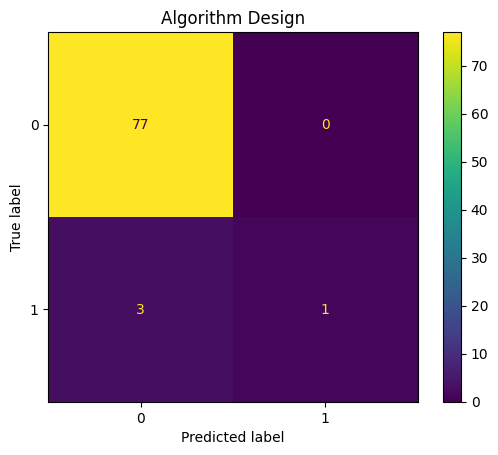

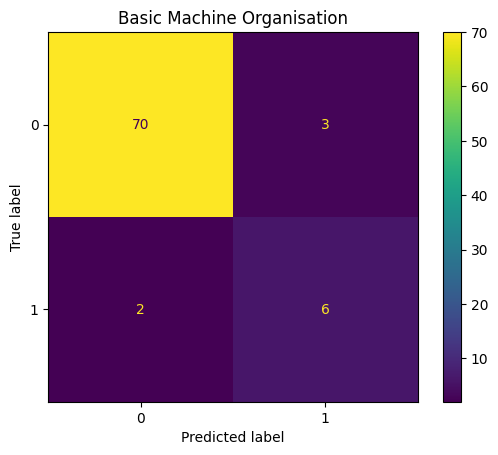

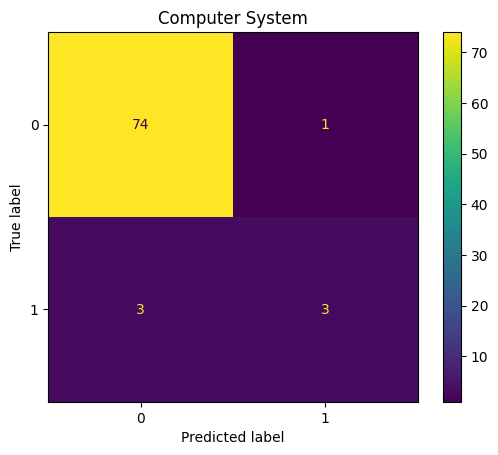

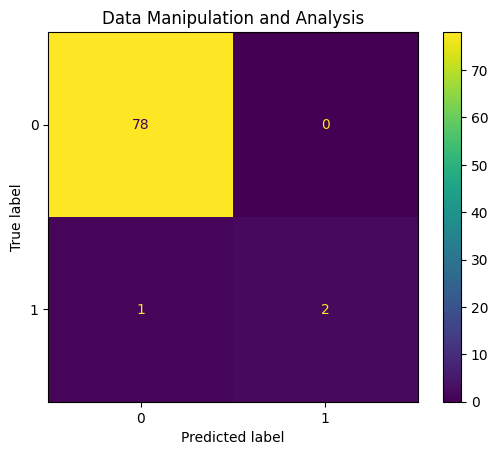

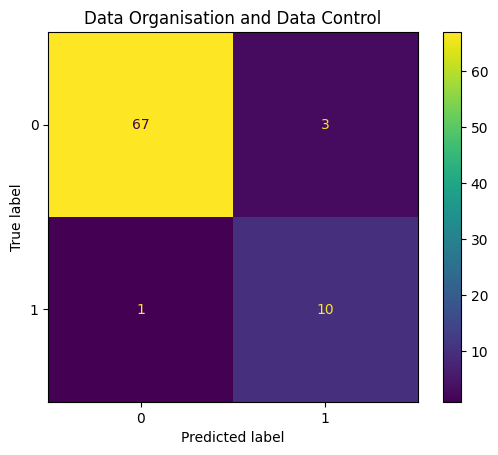

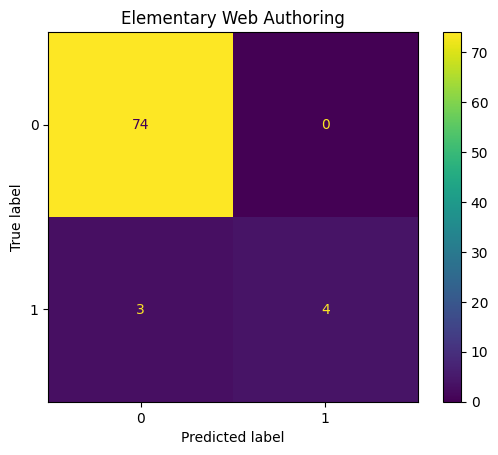

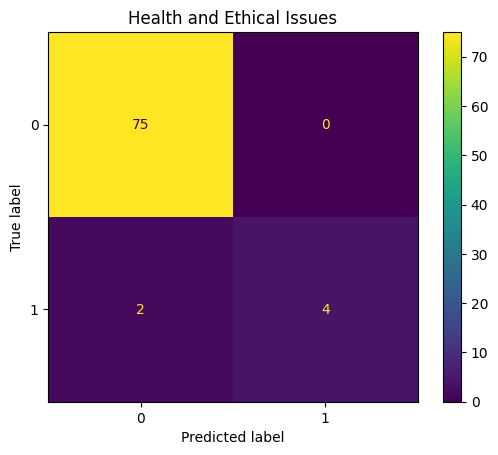

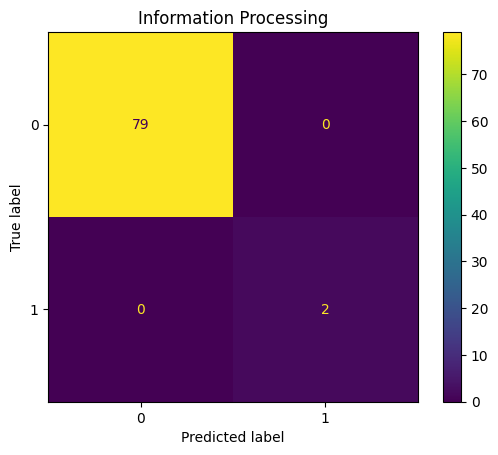

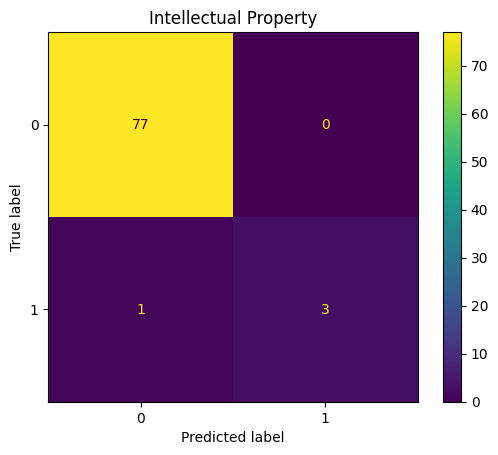

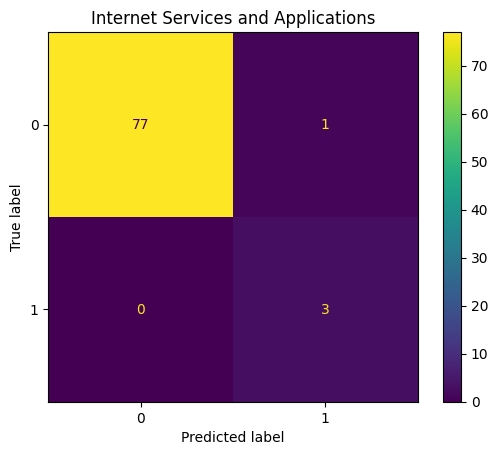

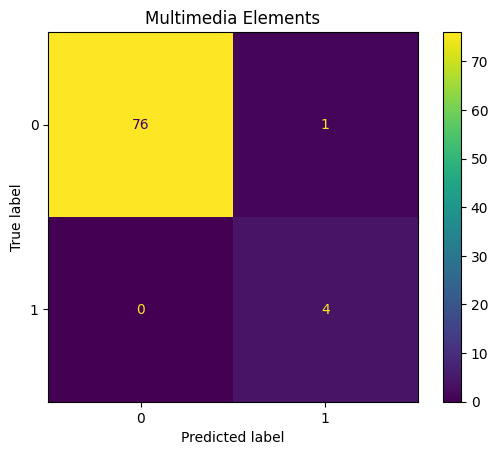

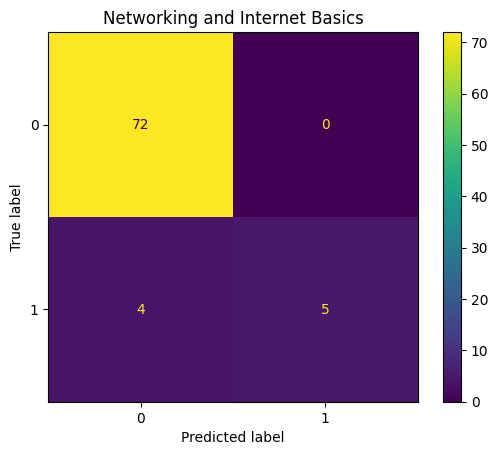

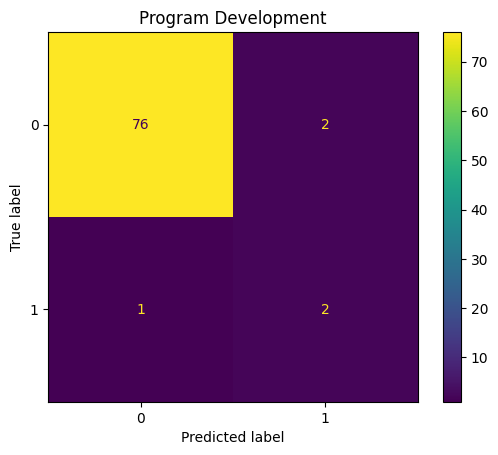

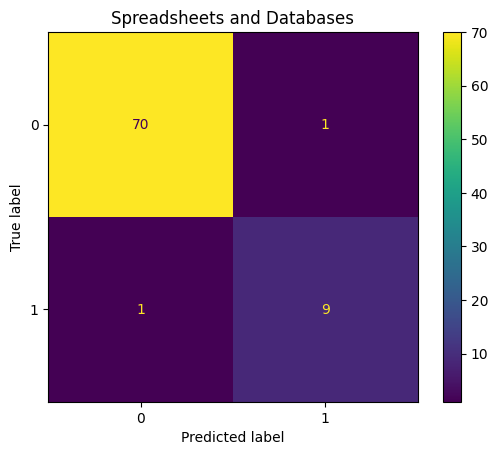

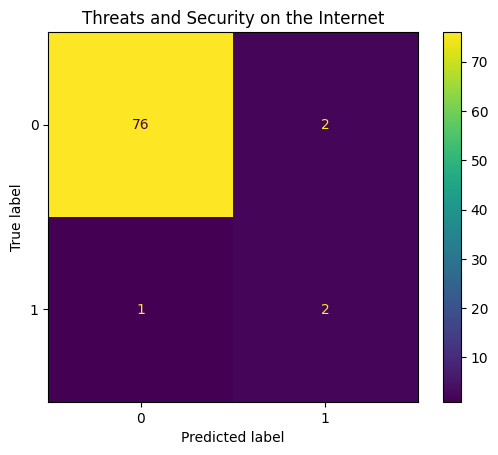

In [62]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt


cm = multilabel_confusion_matrix(prediction_result.label_ids, preds)

# Plot confusion matrix for each label using ConfusionMatrixDisplay
for i in range(len(model_labels)):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm[i], display_labels=[0, 1])
    disp.plot()
    plt.title(model_labels[i])
    plt.show()